# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [5]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

In [6]:
#Loading Libs
import numpy as np
import matplotlib.pyplot as plt


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Image dimensions: (32, 32, 3)
Number of classes: 100


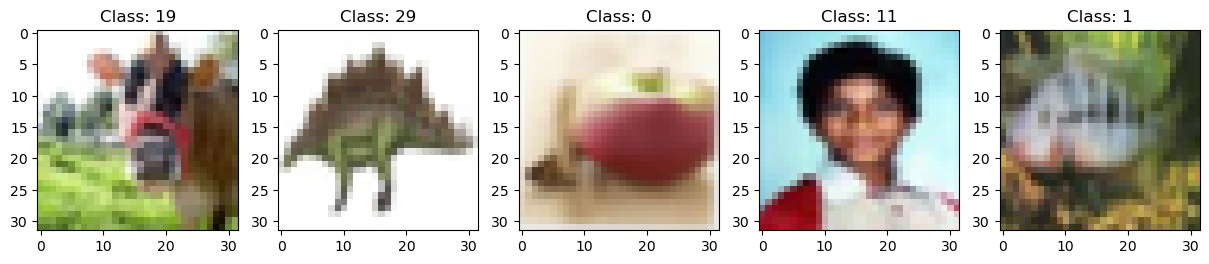

In [7]:
# Your code here
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f"Image dimensions: {X_train.shape[1:]}")

num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(X_train[i]) # X contains the image
    axes[i].set_title(f"Class: {y_train[i][0]}") # Y contains the labels

plt.show()


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [9]:
# Your code here
X_train = X_train.astype('float32') / 255 #normalizing images
X_test = X_test.astype('float32') / 255 #normalizing images

from tensorflow.keras.utils import to_categorical #one hot encode
y_train_one_hot = to_categorical(y_train, num_classes=100)
y_test_one_hot = to_categorical(y_test, num_classes=100)

from sklearn.model_selection import train_test_split #split into testing and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=22)

print(f"Training data shape: {X_train_split.shape}")
print(f"Validation data shape: {X_val_split.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train_split.shape}")
print(f"Validation labels shape: {y_val_split.shape}")
print(f"Test labels shape: {y_test_one_hot.shape}")


Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same'))
model.add(MaxPooling2D((2, 2)))

#Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(512))
model.add(Dense(100, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 256)               1

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Using categorical crossentropy to leverage the accuracy of the sample of one hundred classes.
- <b>Optimizer:</b> Using ADAM because it is a common use for image classification in this industry.

In [11]:
from keras import optimizers

# Your code here
from tensorflow.keras.metrics import Precision, Recall
#@EF
model.compile(optimizer="adam", loss=['categorical_crossentropy'], metrics=['accuracy', Precision(), Recall()])


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [12]:
# Your code here
history = model.fit(X_train_split, y_train_split, batch_size=32, epochs=20, validation_data=(X_val_split, y_val_split), shuffle=True)


Epoch 1/20
1250/1250 [==============================] - 53s 42ms/step - loss: 4.0428 - accuracy: 0.0922 - precision: 0.5313 - recall: 0.0066 - val_loss: 3.6644 - val_accuracy: 0.1420 - val_precision: 0.5353 - val_recall: 0.0197
Epoch 2/20
1250/1250 [==============================] - 48s 39ms/step - loss: 3.5218 - accuracy: 0.1782 - precision: 0.6121 - recall: 0.0302 - val_loss: 3.4864 - val_accuracy: 0.1874 - val_precision: 0.5888 - val_recall: 0.0577
Epoch 3/20
1250/1250 [==============================] - 52s 42ms/step - loss: 3.2289 - accuracy: 0.2286 - precision: 0.6551 - recall: 0.0617 - val_loss: 3.2608 - val_accuracy: 0.2334 - val_precision: 0.6054 - val_recall: 0.0741
Epoch 4/20
1250/1250 [==============================] - 54s 43ms/step - loss: 3.0084 - accuracy: 0.2707 - precision: 0.6707 - recall: 0.0924 - val_loss: 3.0906 - val_accuracy: 0.2633 - val_precision: 0.6123 - val_recall: 0.1036
Epoch 5/20
1250/1250 [==============================] - 58s 46ms/step - loss: 2.8453 - a

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> While it was decreasing on each epoch (as accuracy is the ratio of correct predictions over total number or predictions), it got its best result on epoch #15 which was 56.30%.
- <b>Other metric:</b> Precision.
- <b>Reason for selection:</b> Precision measures the proportion of true positive predictions among all positive predictions. It is an important metric when the cost of false positives is high.
- <b>Value of metric:</b> Precision val_value == 0.3889 
- <b>Interpretation of metric value:</b> The precision validation value of 0.3889 (at epoch #20) indicates that among all the instances that the model predicted as positive, 38.89% were actually positive. This suggests that the model has a moderate level of precision, meaning it correctly identifies positives a little more than a third of the time.

In [1]:
# Your code here

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

313/313 [==============================] - 5s 16ms/step


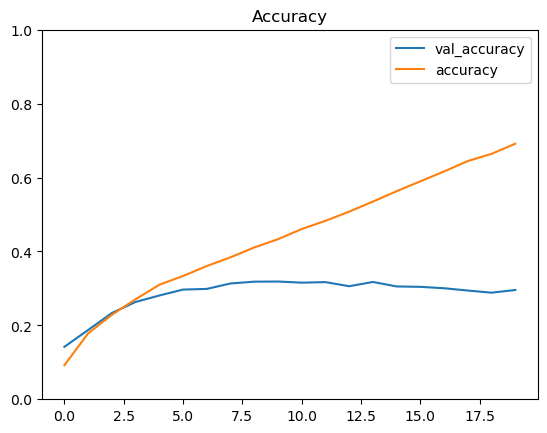

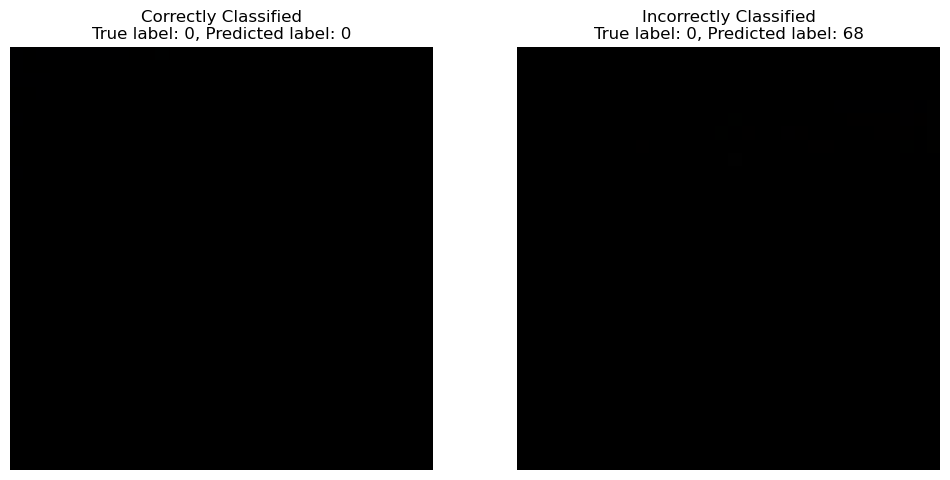

In [13]:
# Your code here
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.ylim(0, 1)
plt.legend(loc='best')
plt.title('Accuracy');

#Correct and wrong classifications
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

#Correct and wrong sample
correct_index = correct_indices[0]
incorrect_index = incorrect_indices[0]

#Correct image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(X_test[correct_index])
plt.title(f"Correctly Classified\nTrue label: {true_labels[correct_index]}, Predicted label: {predicted_labels[correct_index]}")
plt.axis('off')

#Wrong classification
plt.subplot(1, 2, 2)
plt.imshow(X_test[incorrect_index])
plt.title(f"Incorrectly Classified\nTrue label: {true_labels[incorrect_index]}, Predicted label: {predicted_labels[incorrect_index]}")
plt.axis('off')

plt.show()


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [20]:
# Your code here
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Dense(256))
model.add(Dense(100, activation='softmax'))
model.add(Dropout(0.25))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 8, 8, 64)         

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [21]:
# Your code here
model.compile(optimizer="adam", loss=['categorical_crossentropy'], metrics=['accuracy',Precision(), Recall()]) 
history = model.fit(X_train_split, y_train_split, batch_size=32, epochs=20, validation_data=(X_val_split, y_val_split), shuffle=True)


Epoch 1/20
1250/1250 [==============================] - 69s 54ms/step - loss: 7.2785 - accuracy: 0.0095 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 4.6085 - val_accuracy: 0.0103 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/20
1250/1250 [==============================] - 67s 54ms/step - loss: 7.2557 - accuracy: 0.0103 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 4.6076 - val_accuracy: 0.0096 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/20
1250/1250 [==============================] - 69s 55ms/step - loss: 7.2532 - accuracy: 0.0100 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 4.6116 - val_accuracy: 0.0115 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/20
1250/1250 [==============================] - 71s 57ms/step - loss: 7.2881 - accuracy: 0.0095 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 4.6087 - val_accuracy: 0.0098 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

### Current Issues
1. **Performance on Training Data**: The model's accuracy has decreased.
2. **Recall Results**: The model struggles to classify images correctly, indicated by a low recall score.
3. **Validation Results**: Validation performance has improved compared to the previous model, suggesting no overfitting to the training data.

### Analysis
- **Balancing Bias and Variance**: The current situation highlights the challenge of achieving a balance between bias and variance. The goal is to create a model that performs well without being overly accurate on the training data.

### Potential Solutions
1. **Model Adjustments**:
   - Add more layers.
   - Reduce the number of epochs, as more epochs do not significantly improve the model.
   - Implement regularization.
   - Use larger kernel sizes.

2. **Initialization Steps**:
   - Work more on initialization methods.

3. **Data Quality**:
   - Train the model with high res imagesm, thus improving the training flow.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [X] Reviewed the PR description guidelines and adhered to them.
- [X] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.